The UK and Austria have had similar yet different experiences with covid19. Use the dataset
‘covid_UK_Austria.csv’ in the Week 2 folder and plot something that varies over time. Plots of
raw cases numbers are very common, so maybe consider something a bit more interesting!

Too easy? Try indicating the timing of certain events (lockdowns, vaccines) that might help tell
the story of why things have unfolded the way they have.

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches

In [49]:
# Import dataset and look at data
df = pd.read_csv("Covid_UK_Austria.csv")
# df.head(20)
# df.describe()
# df.describe(include=object)

In [91]:
df.columns # list columns
# df.dtypes # list data type of columns
# df[['location', 'new_cases']] # list only location and number of new cases
# df.location.unique() # list how many countries there are

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

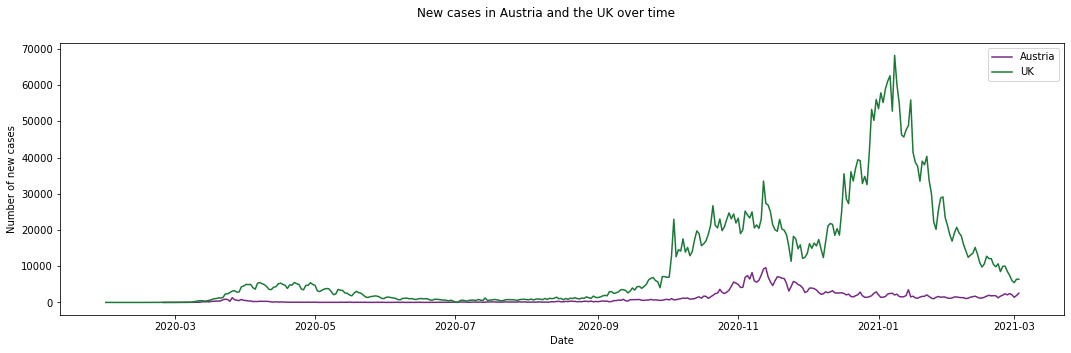

In [54]:
# Group new cases by country
new_by_country = df.groupby("location")['new_cases']
date = df.groupby("location")['date']

# Select new cases for each country
new_cases_AT = new_by_country.get_group("Austria")
new_cases_UK = new_by_country.get_group("United Kingdom")
date_AT = date.get_group("Austria")
date_AT = pd.to_datetime(date_AT)
date_UK = date.get_group("United Kingdom")
date_UK = pd.to_datetime(date_UK)

# Plot
plt.close()
fig = plt.figure(figsize=(18,5))
fig.suptitle("New cases in Austria and the UK over time")

ax = fig.add_subplot(1,1,1)
# ax.set_legend()
ax.set_xlabel("Date")
ax.set_ylabel("Number of new cases")
ax.set_yscale("linear")
ax.plot(date_AT, new_cases_AT, color='#762a83')
ax.plot(date_UK, new_cases_UK, color='#1b7837')
ax.legend(("Austria", "UK"))
plt.show()

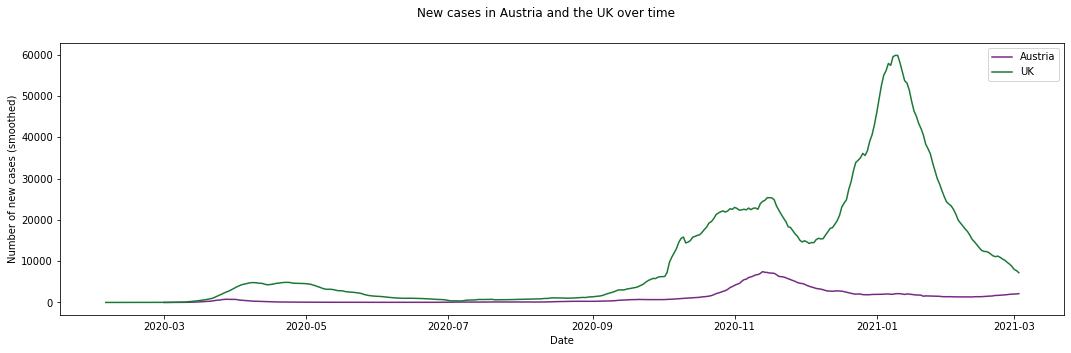

In [55]:
# Group new cases by country: smoothed
# Group new cases by country
new_by_country_smoothed = df.groupby("location")['new_cases_smoothed']

# Select new cases for each country
new_cases_smoothed_AT = new_by_country_smoothed.get_group("Austria")
new_cases_smoothed_UK = new_by_country_smoothed.get_group("United Kingdom")

# Plot
plt.close()
fig = plt.figure(figsize=(18,5))
fig.suptitle("New cases in Austria and the UK over time")

ax = fig.add_subplot(1,1,1)
# ax.set_legend()
ax.set_xlabel("Date")
ax.set_ylabel("Number of new cases (smoothed)")
ax.set_yscale("linear")
ax.plot(date_AT, new_cases_smoothed_AT, color='#762a83')
ax.plot(date_UK, new_cases_smoothed_UK, color='#1b7837')
ax.legend(("Austria", "UK"))
plt.show()

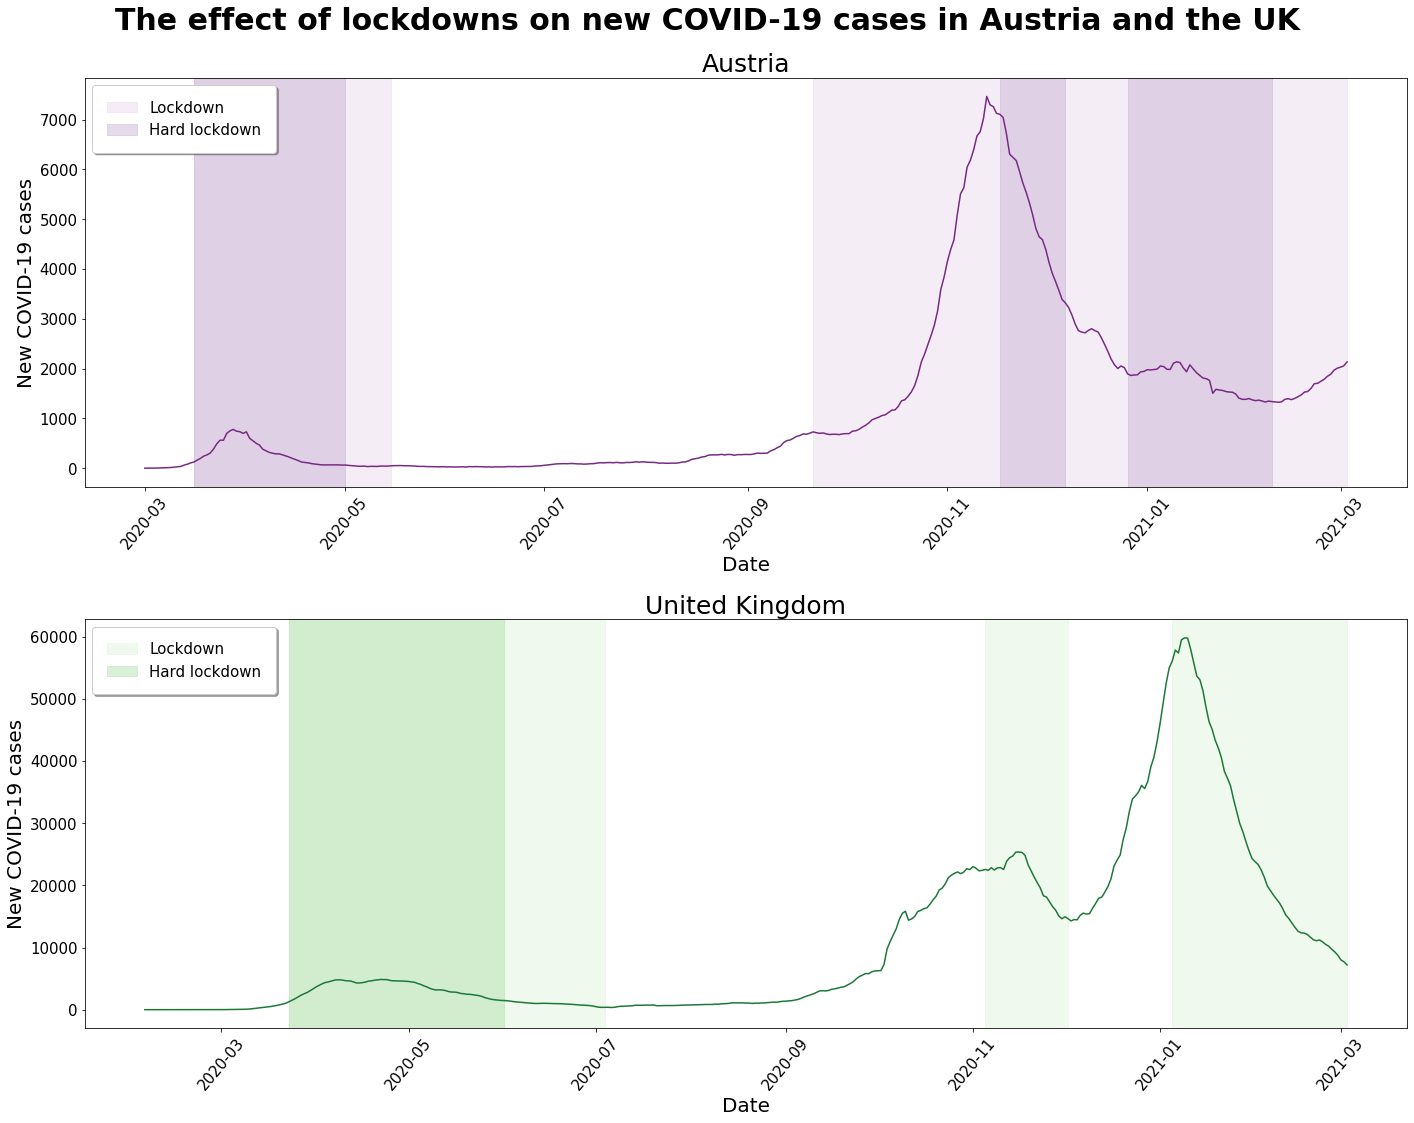

In [246]:
# Plot lockdowns for both countries
fig = plt.figure(figsize=(20,16))
fig.suptitle("The effect of lockdowns on new COVID-19 cases in Austria and the UK", y=0.98, fontsize=30, weight='semibold')
fig.subplots_adjust(bottom=0.02)

###### Austria #######
ax1 = fig.add_subplot(2,1,1)
ax1.plot(date_AT, new_cases_smoothed_AT, color='#762a83')
ax1.set_yscale("linear")
# ax1.set_ylim(0,65000)
ax1.set_title('Austria', fontsize=25)
ax1.set_xlabel("Date", fontsize=20)
ax1.set_ylabel("New COVID-19 cases", fontsize=20)
ax1.tick_params(axis='x', labelsize=15, rotation=50)
ax1.tick_params(axis='y', labelsize=15)

# First lockdown AT
ax1.axvspan('2020-03-16', '2020-05-15', color='#e7d4e8', alpha=0.4)  # total duration
ax1.axvspan('2020-03-16', '2020-05-01', color='#c2a5cf', alpha=0.4) # hard
# Second lockdown AT
ax1.axvspan('2020-09-21', '2021-03-03', color='#e7d4e8', alpha=0.4) # total duration
ax1.axvspan('2020-11-17', '2020-12-07', color='#c2a5cf', alpha=0.4) # hard
ax1.axvspan('2020-12-26', '2021-02-08', color='#c2a5cf', alpha=0.4) # hard

# Legend
purple1 = mpatches.Patch(color='#e7d4e8', alpha=0.4, label='Lockdown')
purple2 = mpatches.Patch(color='#c2a5cf', alpha=0.4, label='Hard lockdown')
ax1.legend(handles=[purple1, purple2], fontsize=15, loc=2, fancybox=True, borderpad=1, shadow=True)

##########################################################################################
######## UK #########
ax2 = fig.add_subplot(212)
ax2.plot(date_UK, new_cases_smoothed_UK, color='#1b7837')
ax2.set_yscale("linear")
# ax2.set_ylim(0,65000)
ax2.set_title('United Kingdom', fontsize=25)
ax2.set_xlabel("Date", fontsize=20)
ax2.set_ylabel("New COVID-19 cases", fontsize=20)
ax2.tick_params(axis='x', labelsize=15, rotation=50)
ax2.tick_params(axis='y', labelsize=15)

# First lockdown UK
ax2.axvspan('2020-03-23', '2020-07-04', color='#d9f0d3', alpha=0.4)  # total duration
ax2.axvspan('2020-03-23', '2020-06-01', color='#a6dba0', alpha=0.4) # hard

# Second lockdown UK
ax2.axvspan('2020-11-05', '2020-12-02', color='#d9f0d3', alpha=0.4) # total duration

# Third lockdown UK
ax2.axvspan('2021-01-05', '2021-03-03', color='#d9f0d3', alpha=0.4) # total duration

# Legend
green1 = mpatches.Patch(color='#d9f0d3', alpha=0.4, label='Lockdown')
green2 = mpatches.Patch(color='#a6dba0', alpha=0.4, label='Hard lockdown')
ax2.legend(handles=[green1, green2], fontsize=15, loc=2, fancybox=True, borderpad=1, shadow=True)


plt.tight_layout(pad=2)
plt.show()
# plt.savefig('figure.pdf') # , format='eps'

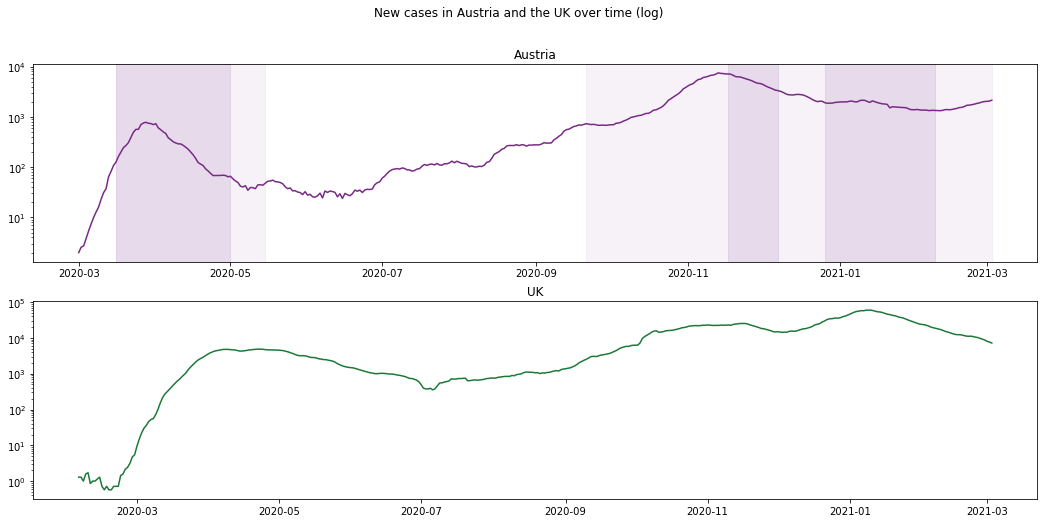

In [72]:
# Plot new cases on a log scale
fig = plt.figure(figsize=(18,8))
fig.suptitle("New cases in Austria and the UK over time (log)")

###### Austria #######
ax1 = fig.add_subplot(2,1,1)
ax1.plot(date_AT, new_cases_smoothed_AT, color='#762a83')
ax1.set_yscale("log")
ax1.title.set_text("Austria")
# Lockdowns AT
ax1.axvspan('2020-03-16', '2020-05-15', color='#e7d4e8', alpha=0.3)  # 1st lockdown
ax1.axvspan('2020-03-16', '2020-05-01', color='#c2a5cf', alpha=0.3) # hard
ax1.axvspan('2020-09-21', '2021-03-03', color='#e7d4e8', alpha=0.3) # 2nd lockdown
ax1.axvspan('2020-11-17', '2020-12-07', color='#c2a5cf', alpha=0.3) # hard
ax1.axvspan('2020-12-26', '2021-02-08', color='#c2a5cf', alpha=0.3) # hardax1.set_yscale("log")


######## UK #########
ax2 = fig.add_subplot(2,1,2)
ax2.plot(date_UK, new_cases_smoothed_UK, color='#1b7837')
ax2.title.set_text("UK")
ax2.set_yscale("log")
plt.show()

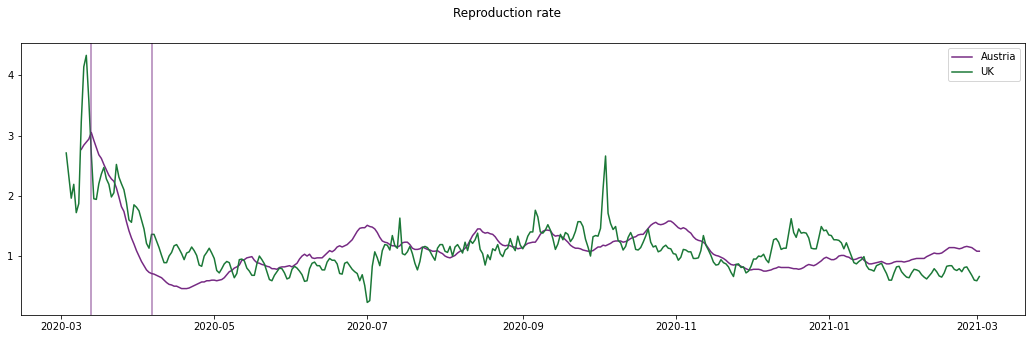

In [12]:
# Plot R-value
# R value
reproduction_rate = df.groupby("location")['reproduction_rate']
r_AT = reproduction_rate.get_group("Austria")
r_UK = reproduction_rate.get_group("United Kingdom")

fig = plt.figure(figsize=(18,5))
fig.suptitle("Reproduction rate")
ax = fig.add_subplot(1,1,1)
ax.plot(date_AT, r_AT, color='#762a83')
ax.plot(date_UK, r_UK, color='#1b7837')
ax.axvline('2020-03-13', color='#762a83', alpha=0.6) # lockdown 1
ax.axvline('2020-04-06', color='#762a83', alpha=0.6) # mask requirement
ax.legend(("Austria", "UK"))
plt.show()

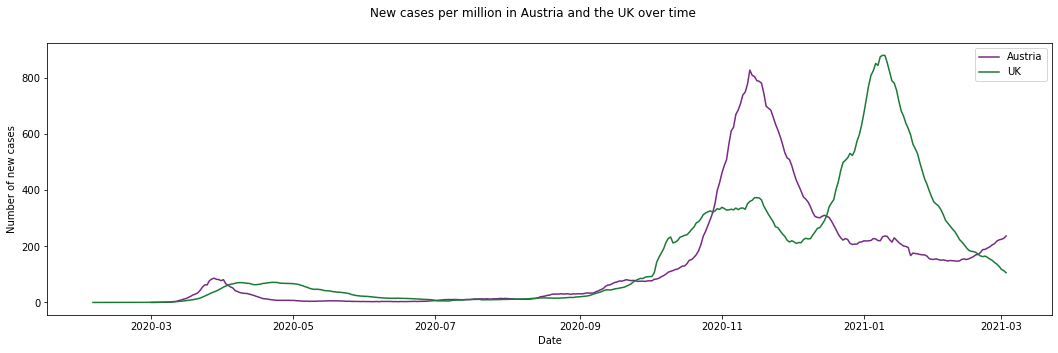

In [64]:
# Group new cases per million by country
new_permil_by_country = df.groupby("location")['new_cases_smoothed_per_million']
new_cases_permil_AT = new_permil_by_country.get_group("Austria")
new_cases_permil_UK = new_permil_by_country.get_group("United Kingdom")

# Plot
plt.close()
fig = plt.figure(figsize=(18,5))
fig.suptitle("New cases per million in Austria and the UK over time")

ax = fig.add_subplot(1,1,1)
# ax.set_legend()
ax.set_xlabel("Date")
ax.set_ylabel("Number of new cases")
ax.plot(date_AT, new_cases_permil_AT, color='#762a83')
ax.plot(date_UK, new_cases_permil_UK, color='#1b7837')
ax.legend(("Austria", "UK"))
plt.show()

In [14]:
# # Plot S&P 500
# SPindex = pd.read_csv("INDEX_US_S&P US_SPX.csv")
# SPindex = SPindex[::-1] # change date order
# print(SPindex["Close"].dtypes) # the values are strings
# # SPindex_close = SPindex["Close"].astype(float)

# commas_removed = SPindex["Close"].str.replace(',', '')
# SPindex_close = pd.to_numeric(commas_removed)
# sns.lineplot(date_AT, SPindex_close)

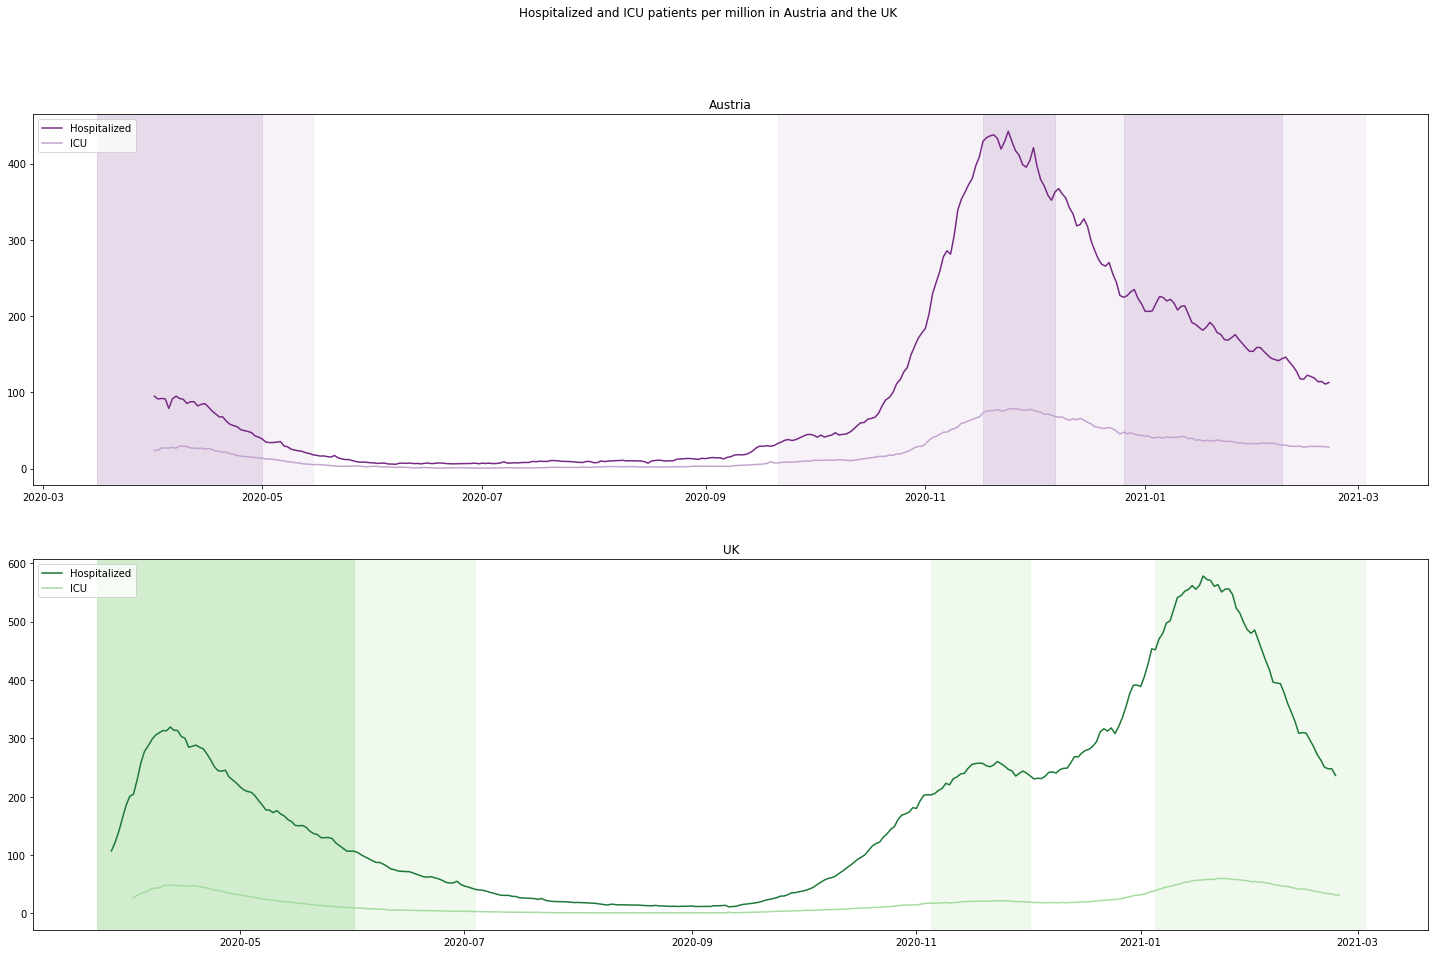

In [108]:
# Plot hospitalized and ICU patients per million
hosp_bycountry = df.groupby("location")["hosp_patients_per_million"]
hosp_AT = hosp_bycountry.get_group("Austria")
hosp_UK = hosp_bycountry.get_group("United Kingdom")
icu_bycountry = df.groupby("location")["icu_patients_per_million"]
icu_AT = icu_bycountry.get_group("Austria")
icu_UK = icu_bycountry.get_group("United Kingdom")

# Plot
fig = plt.figure(figsize=(25,15))
plt.suptitle("Hospitalized and ICU patients per million in Austria and the UK")
ax1 = fig.add_subplot(211)
ax1.plot(date_AT, hosp_AT, color='#762a83')
ax1.plot(date_AT, icu_AT, color='#c2a5cf')
ax1.title.set_text("Austria")
ax1.legend(("Hospitalized", "ICU"), loc=2)

# First lockdown
ax1.axvspan('2020-03-16', '2020-05-15', color='#e7d4e8', alpha=0.3)  # total duration
ax1.axvspan('2020-03-16', '2020-05-01', color='#c2a5cf', alpha=0.3) # hard

# Second lockdown
ax1.axvspan('2020-09-21', '2021-03-03', color='#e7d4e8', alpha=0.3) # total duration
ax1.axvspan('2020-11-17', '2020-12-07', color='#c2a5cf', alpha=0.3) # hard
ax1.axvspan('2020-12-26', '2021-02-08', color='#c2a5cf', alpha=0.3) # hard



ax2 = fig.add_subplot(212)
ax2.title.set_text("UK")
ax2.plot(date_UK, hosp_UK, color='#1b7837')
ax2.plot(date_UK, icu_UK, color='#a6dba0')
ax2.legend(("Hospitalized", "ICU"), loc=2)

# First lockdown UK
ax2.axvspan('2020-03-23', '2020-07-04', color='#d9f0d3', alpha=0.4)  # total duration
ax2.axvspan('2020-03-23', '2020-06-01', color='#a6dba0', alpha=0.4) # hard

# Second lockdown UK
ax2.axvspan('2020-11-05', '2020-12-02', color='#d9f0d3', alpha=0.4) # total duration

# Third lockdown UK
ax2.axvspan('2021-01-05', '2021-03-03', color='#d9f0d3', alpha=0.4) # total duration


plt.show()

# fig2

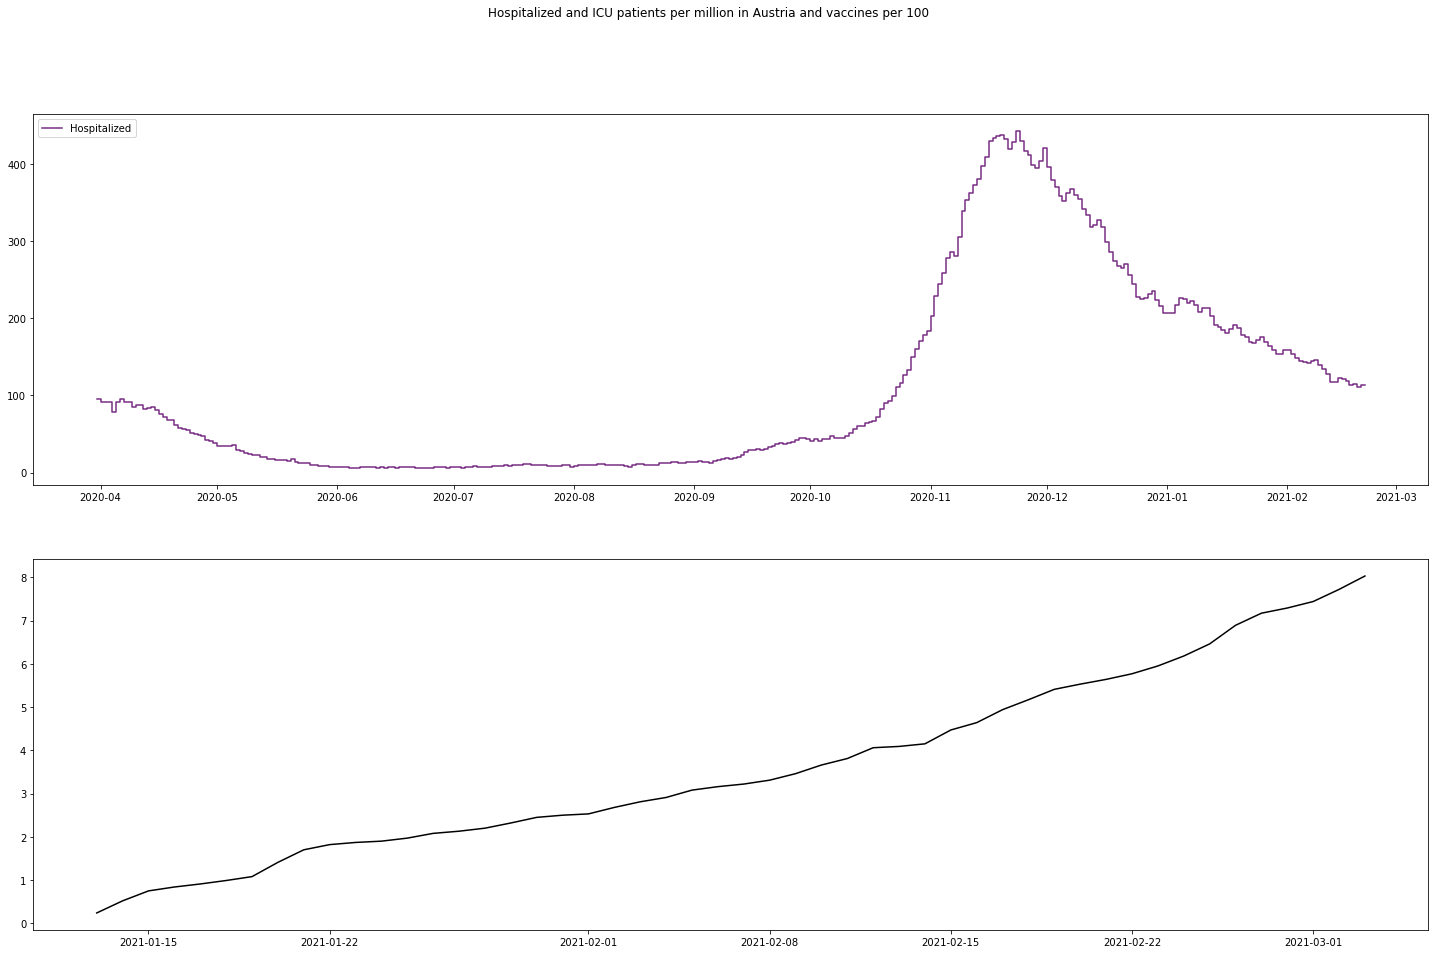

In [89]:
# Vaccinations and effect on new cases, hopitalizations, and ICU hospitalizations
total_vacc_bycountry = df.groupby("location")["total_vaccinations_per_hundred"]
total_vacc_AT = total_vacc_bycountry.get_group("Austria")
# Plot

fig = plt.figure(figsize=(25,15))
plt.suptitle("Hospitalized and ICU patients per million in Austria and vaccines per 100")
ax1 = fig.add_subplot(211)
# ax1.plot(date_AT, hosp_AT, color='#762a83')
ax1.step(date_AT, hosp_AT, color='#762a83')
ax1.legend(("Hospitalized", "ICU"), loc=2)

ax2 = fig.add_subplot(212)
ax2.plot(date_AT, total_vacc_AT, color='black')

# Notes:
- possibly smooth log scale

In [ ]:
# testing ssh